In [1]:
# Class name: AI1811
# Student code: HE181685
# Student name: Nguyễn Thành Trung
# Subject: CPV301-LAB6

In [1]:
pip install opencv-python opencv-contrib-python


  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Images successfully stitched!


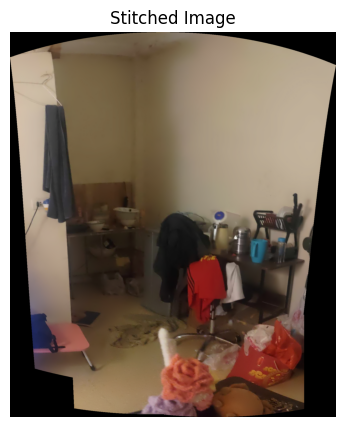

Stitched image saved as 'stitched_output.jpg'


In [8]:
def read_images(image_paths):
    images = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            print(f"Error loading image {path}")
        else:
            images.append(image)
    return images

def stitch_images(images):
    stitcher = cv2.Stitcher_create()
    
    status, stitched_image = stitcher.stitch(images)
    
    if status == cv2.Stitcher_OK:
        print("Images successfully stitched!")
        return stitched_image
    else:
        print(f"Image stitching failed with error code {status}")
        return None

def display_image(image, title="Image"):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 5))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    image_paths = []
    for i in range(1, 4):  # Loop to collect 3 images
        path = input(f"Enter the path for image {i}: ").strip()
        image_paths.append(path)
    
    images = read_images(image_paths)
    
    if len(images) > 1:
        stitched_image = stitch_images(images)
        
        if stitched_image is not None:
            display_image(stitched_image, title="Stitched Image")
            cv2.imwrite("stitched_output.jpg", stitched_image)
            print("Stitched image saved as 'stitched_output.jpg'")
    else:
        print("Not enough images to stitch.")


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageStitching:
    def __init__(self, ratio=0.5, min_match=10, smoothing_window_size=800):
        self.ratio = ratio
        self.min_match = min_match
        self.smoothing_window_size = smoothing_window_size
        self.sift = cv2.SIFT_create()

    def searchkp(self, img1, img2):
        kp1, des1 = self.sift.detectAndCompute(img1, None)
        kp2, des2 = self.sift.detectAndCompute(img2, None)

        matcher = cv2.BFMatcher()
        raw_matcher = matcher.knnMatch(des1, des2, k=2)
        good_points = []
        good_matches = []

        for m1, m2 in raw_matcher:
            if m1.distance < self.ratio * m2.distance:
                good_points.append((m1.trainIdx, m1.queryIdx))
                good_matches.append(m1)

        good_matches = sorted(good_matches, key=lambda x: x.distance, reverse=True)
        good_matches = good_matches[:500]
        img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        cv2.imwrite('matching.jpg', img3)

        if len(good_points) > self.min_match:
            pts1 = np.float32([kp1[i].pt for (_, i) in good_points])
            pts2 = np.float32([kp2[i].pt for (i, _) in good_points])

        H, status = cv2.findHomography(pts1, pts2, cv2.RANSAC)

        plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
        plt.show()
        return H

    def ghep(self, img1, img2):
        H = self.searchkp(img1, img2)
        h1, w1 = img1.shape[:2]
        h2, w2 = img2.shape[:2]
        res = cv2.warpPerspective(img1, H, (w2 + w2, h1))
        res[0:h2, 0:w2] = img2
        return res

    def read_images(self, image_paths):
        images = []
        for path in image_paths:
            image = cv2.imread(path)
            if image is None:
                print(f"Error loading image {path}")
            else:
                images.append(image)
        return images

    def stitch_images(self, images):
        if len(images) < 2:
            print("Not enough images to stitch.")
            return None

        stitched_image = images[0]
        for i in range(1, len(images)):
            stitched_image = self.ghep(stitched_image, images[i])
        
        return stitched_image

    def display_image(self, image, title="Image"):
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 5))
        plt.imshow(image_rgb)
        plt.title(title)
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    image_paths = []
    for i in range(1, 4):  # Loop to collect 3 images
        path = input(f"Enter the path for image {i}: ").strip()
        image_paths.append(path)
    
    stitcher = ImageStitching()
    images = stitcher.read_images(image_paths)
    
    if len(images) > 1:
        stitched_image = stitcher.stitch_images(images)
        
        if stitched_image is not None:
            stitcher.display_image(stitched_image, title="Stitched Image")
            cv2.imwrite("stitched_output.jpg", stitched_image)
            print("Stitched image saved as 'stitched_output.jpg'")


UnboundLocalError: cannot access local variable 'pts1' where it is not associated with a value